### K - Prototype Clustering

In [2]:
!pip install kmodes

In [3]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

In [4]:
import json
import pandas as pd
from collections import defaultdict
from typing import Dict, Any
import hashlib

In [5]:
with open('anomalies.dump', 'r') as f:
    data = json.load(f)

In [6]:
df = pd.DataFrame(data)

In [7]:
df.head()

,__id,algo_params,call_stack,counter_events,entry,event_id,event_window,exit,fid,func,...,io_step_tend,io_step_tstart,is_gpu_event,outlier_score,outlier_severity,pid,rid,runtime_exclusive,runtime_total,tid
0,0,"{'histogram': {'Histogram Bin Counts': [3, 5, ...","[{'entry': 1648661826572801, 'event_id': '392:...",[],1648661826572801,392:0:46,"{'comm_window': [], 'exec_window': [{'entry': ...",1648661826572842,13,pthread_create,...,1648661820195197,1648661810277490,False,2.000000,41,0,392,41,41,0
1,1,"{'histogram': {'Histogram Bin Counts': [4, 7, ...","[{'entry': 1648661820195145, 'event_id': '392:...",[],1648661820195145,392:0:5,"{'comm_window': [], 'exec_window': [{'entry': ...",1648661820195152,334,MPI_Comm_size(),...,1648661820195197,1648661810277490,False,4.169925,7,0,392,7,7,0
2,2,"{'histogram': {'Histogram Bin Counts': [20, 24...","[{'entry': 1648661820195024, 'event_id': '392:...",[],1648661820195024,392:0:1,"{'comm_window': [], 'exec_window': [{'entry': ...",1648661820195033,223,MPI_Comm_rank(),...,1648661820195197,1648661810277490,False,3.584963,9,0,392,9,9,0
3,3,"{'histogram': {'Histogram Bin Counts': [9, 8, ...","[{'entry': 1648661820200575, 'event_id': '392:...",[],1648661820200575,392:0:7,"{'comm_window': [], 'exec_window': [{'entry': ...",1648661820200593,445,MPI_Get_processor_name(),...,1648661820195197,1648661810277490,False,100.000111,18,0,392,18,18,0
4,4,"{'histogram': {'Histogram Bin Counts': [2, 3, ...","[{'entry': 1648661820396855, 'event_id': '392:...","[{'counter_idx': 0, 'counter_name': 'Message s...",1648661820396855,392:0:43,"{'comm_window': [], 'exec_window': [{'entry': ...",1648661820396921,594,MPI_Bcast(),...,1648661820195197,1648661810277490,False,3.584963,66,0,392,66,66,0


In [8]:
#We define the function to 

def dict_hash(dictionary: Dict[str, Any]) -> str:
    """MD5 hash of a dictionary."""
    dhash = hashlib.md5()
    # We need to sort arguments so {'a': 1, 'b': 2} is
    # the same as {'b': 2, 'a': 1}
    encoded = json.dumps(dictionary, sort_keys=True).encode()
    dhash.update(encoded)
    return dhash.hexdigest()

In [9]:
func_id=[]
entry=[]
exit=[]
io_step_tend=[]
io_step_tstart=[]
is_gpu_event=[]
outlier_score=[]
outlier_severity=[]
func_hash=[]
call_stack_func=[]
func=[]
rid=[]
__id=[]
tid=[]
for i in range(50226):
    res = defaultdict(list)
    for sub in (df['call_stack'][i]):
        for key in sub:
            res[key].append(sub[key])
    #print(i,dict_hash(res['func']))
    call_stack_func.append(res['func'])
    func_id.append(df['__id'][i])
    func_hash.append(dict_hash(res['func']))
    func.append(df['func'][i])
    rid.append(df['rid'][i])
    entry.append(df['entry'][i])
    exit.append(df['exit'][i])
    io_step_tend.append(df['io_step_tend'][i])
    io_step_tstart.append(df['io_step_tstart'][i])
    is_gpu_event.append(df['is_gpu_event'][i])
    outlier_score.append(df['outlier_score'][i])
    outlier_severity.append(df['outlier_severity'][i])
    __id.append(df['__id'][i])
    tid.append(df['tid'][i])
    
    

In [10]:
df1 = zip(__id,entry,exit,io_step_tend, io_step_tstart,is_gpu_event, outlier_score, outlier_severity,rid,tid,func_hash,call_stack_func,func,func_id)
#df1 = pd.DataFrame(func_df, columns = ['__id','entry','exit','io_step_tend', 'io_step_tstart','is_gpu_event', 'outlier_score', 'outlier_severity','rid','tid','hash_func','call_stack_func','func','func_id]

In [11]:
df1 = pd.DataFrame(df1, columns = ['__id','entry','exit','io_step_tend', 'io_step_tstart','is_gpu_event', 'outlier_score', 'outlier_severity','rid','tid','hash_func','call_stack_func','func','func_id'])

In [12]:
#df1 =df1.drop('__id', axis =1)

In [13]:
df1.head()

,__id,entry,exit,io_step_tend,io_step_tstart,is_gpu_event,outlier_score,outlier_severity,rid,tid,hash_func,call_stack_func,func,func_id
0,0,1648661826572801,1648661826572842,1648661820195197,1648661810277490,False,2.000000,41,392,0,eed8c4ea90b205288aae6e82c49c7392,"[pthread_create, OpenMP_Parallel_Region _ZN6Ko...",pthread_create,0
1,1,1648661820195145,1648661820195152,1648661820195197,1648661810277490,False,4.169925,7,392,0,731c389ef63cdc69848c29f9b0f45231,"[MPI_Comm_size(), OpenMP_Implicit_Task]",MPI_Comm_size(),1
2,2,1648661820195024,1648661820195033,1648661820195197,1648661810277490,False,3.584963,9,392,0,7c747741648f2c536cb8ecde94f3b768,"[MPI_Comm_rank(), OpenMP_Implicit_Task]",MPI_Comm_rank(),2
3,3,1648661820200575,1648661820200593,1648661820195197,1648661810277490,False,100.000111,18,392,0,e802aac4e376612efae9bfe6e12c6ec5,"[MPI_Get_processor_name(), OpenMP_Implicit_Task]",MPI_Get_processor_name(),3
4,4,1648661820396855,1648661820396921,1648661820195197,1648661810277490,False,3.584963,66,392,0,717dfbe571f28fdd5a07f67efdeaaf35,"[MPI_Bcast(), OpenMP_Implicit_Task]",MPI_Bcast(),4


In [14]:
df1 = df1.drop('call_stack_func', axis =1)

In [15]:
df1.head()

,__id,entry,exit,io_step_tend,io_step_tstart,is_gpu_event,outlier_score,outlier_severity,rid,tid,hash_func,func,func_id
0,0,1648661826572801,1648661826572842,1648661820195197,1648661810277490,False,2.000000,41,392,0,eed8c4ea90b205288aae6e82c49c7392,pthread_create,0
1,1,1648661820195145,1648661820195152,1648661820195197,1648661810277490,False,4.169925,7,392,0,731c389ef63cdc69848c29f9b0f45231,MPI_Comm_size(),1
2,2,1648661820195024,1648661820195033,1648661820195197,1648661810277490,False,3.584963,9,392,0,7c747741648f2c536cb8ecde94f3b768,MPI_Comm_rank(),2
3,3,1648661820200575,1648661820200593,1648661820195197,1648661810277490,False,100.000111,18,392,0,e802aac4e376612efae9bfe6e12c6ec5,MPI_Get_processor_name(),3
4,4,1648661820396855,1648661820396921,1648661820195197,1648661810277490,False,3.584963,66,392,0,717dfbe571f28fdd5a07f67efdeaaf35,MPI_Bcast(),4


In [16]:
df_array = df1.values

In [17]:
df_array[:,0] = df_array[:,0].astype(float)
df_array[:,1] = df_array[:,1].astype(float)
df_array[:,2] = df_array[:,2].astype(float)
df_array[:,3] = df_array[:,3].astype(float)
df_array[:,4] = df_array[:,4].astype(float)
df_array[:,6] = df_array[:,6].astype(float)
df_array[:,7] = df_array[:,7].astype(float)
df_array[:,8] = df_array[:,8].astype(float)
df_array[:,9] = df_array[:,9].astype(float)
df_array[:,12] = df_array[:,12].astype(float)


### Questions

* Do we have some hash func the same rid?
* do we have rid clustering around the outlier severity?
* Is there any correlation between the variables?
* hashfunc with each variable 
*

In [18]:

# Importing required packages
import numpy as np
import pandas as pd 
import random
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os



In [19]:
!pip install dython


In [20]:
for y in df1.columns:
    if(df1[y].dtype == np.float64):
        df1[y] = df1[y].astype(int)

df1.dtypes


__id                 int64
entry                int64
exit                 int64
io_step_tend         int64
io_step_tstart       int64
is_gpu_event          bool
outlier_score        int32
outlier_severity     int64
rid                  int64
tid                  int64
hash_func           object
func                object
func_id              int64
dtype: object

In [25]:
Data_Correlation=df1.iloc[:, [1,2,3,4,5,6,7,8,9,10,12]]
Data_Correlation.head()


,entry,exit,io_step_tend,io_step_tstart,is_gpu_event,outlier_score,outlier_severity,rid,tid,hash_func,func_id
0,1648661826572801,1648661826572842,1648661820195197,1648661810277490,False,2,41,392,0,eed8c4ea90b205288aae6e82c49c7392,0
1,1648661820195145,1648661820195152,1648661820195197,1648661810277490,False,4,7,392,0,731c389ef63cdc69848c29f9b0f45231,1
2,1648661820195024,1648661820195033,1648661820195197,1648661810277490,False,3,9,392,0,7c747741648f2c536cb8ecde94f3b768,2
3,1648661820200575,1648661820200593,1648661820195197,1648661810277490,False,100,18,392,0,e802aac4e376612efae9bfe6e12c6ec5,3
4,1648661820396855,1648661820396921,1648661820195197,1648661810277490,False,3,66,392,0,717dfbe571f28fdd5a07f67efdeaaf35,4


In [22]:
import dython.model_utils 
#from dython.model_utils import roc_graph
from dython.nominal import associations

def associations_example():
    associations(Data_Correlation,nominal_columns=['hash_func','is_gpu_event'])

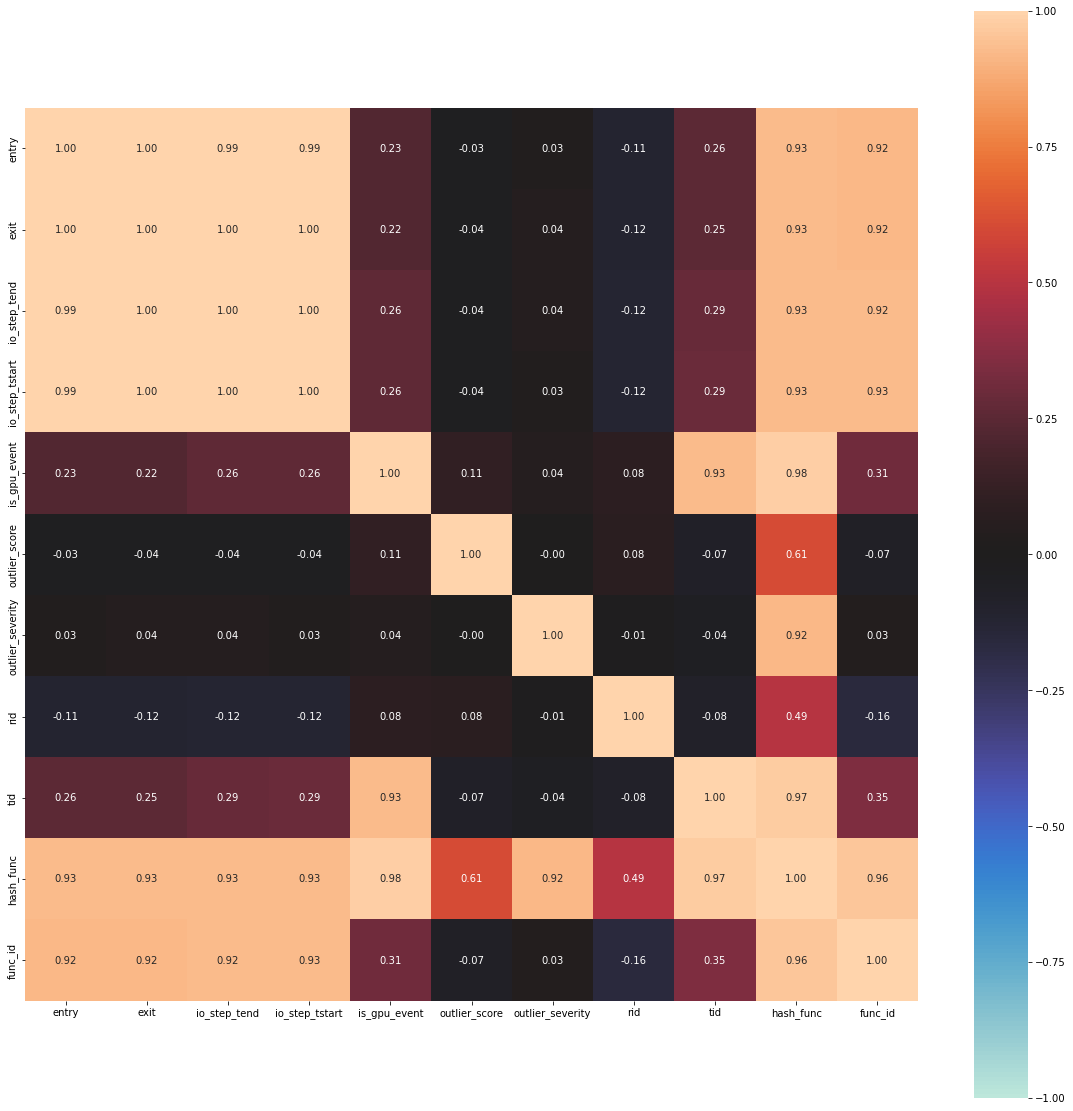

In [23]:
#theil's U statistics

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,20
associations_example()

## Insights:
           *hash func is correlated with entry, exit, io_step_tend, io_step_start,is_gpu_event,outlier_severity,
           * tid is correlated with is_gpu_event, hash_func
           * rid is not correlated with anything except  a little with the hash_func
           * outlier_sev is correlated with hash function
           * outlier_score is correlated with hash function
           * io_step_tend is correlated with entry, exit, io_step_tstart, hash_func,func_id
           * exit is correlated with entry, io_step_tend,io_step_tstart, hash_func,func_id
           * entry is is correlated with entry, exit, io_step_tend,io_step_tstart, hash_func,func_id
           * exit is correlated with exit, io_step_tend,io_step_tstart, hash_func,func_id
            